<a href="https://colab.research.google.com/github/janboehm/Livox-SDK/blob/master/E57_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get -qq install -y libxerces-c-dev
!pip install pye57

Selecting previously unselected package libxerces-c-dev.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../libxerces-c-dev_3.2.0+debian-2_amd64.deb ...
Unpacking libxerces-c-dev (3.2.0+debian-2) ...
Setting up libxerces-c-dev (3.2.0+debian-2) ...


In [74]:
import numpy as np
import pye57

e57 = pye57.E57("FLS_Import_PTX_subsample.e57")

# the ScanHeader object wraps most of the scan information:
header = e57.get_header(0)
print(header.point_count)
print(header.rotation_matrix)
print(header.translation)


1757532
[[ 4.60490739e-01  8.87664506e-01  7.03021032e-05]
 [-8.87664508e-01  4.60490735e-01  6.49407182e-05]
 [ 2.52721034e-05 -9.23092812e-05  9.99999995e-01]]
[ 0.          0.         30.30710827]


In [75]:
# other attributes can be read using
# use 'raw' to read full matrix and avoid deletion of invalid points

data = e57.read_scan_raw(0)
assert isinstance(data["cartesianX"], np.ndarray)
assert isinstance(data["cartesianY"], np.ndarray)
assert isinstance(data["cartesianZ"], np.ndarray)
assert isinstance(data["intensity"], np.ndarray)
assert isinstance(data["colorRed"], np.ndarray)
assert isinstance(data["colorGreen"], np.ndarray)
assert isinstance(data["colorBlue"], np.ndarray)
assert isinstance(data["rowIndex"], np.ndarray)
assert isinstance(data["columnIndex"], np.ndarray)


In [77]:
# reshape data into 2D arrays and stack into 3D array for RGB image
# get matric dimansions from E57 header (and add +1!)

c = header.columnMaximum
r = header.rowMaximum
red = np.reshape(data["colorRed"], (c+1, r+1))
green = np.reshape(data["colorGreen"], (c+1, r+1))
blue = np.reshape(data["colorBlue"], (c+1, r+1))
rgb = np.dstack((red, green, blue))
rgb.shape

(2058, 854, 3)

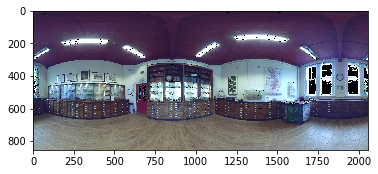

In [84]:
from matplotlib import pyplot as plt
plt.imshow(rgb.swapaxes(0,1), interpolation='nearest')
plt.show()